In [1]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report



2024-01-10 05:44:14.232408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('hair_loss.csv')
X = data.drop('hair_fall', axis=1)
y = data.hair_fall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
y_train

76513    2
60406    1
27322    4
53699    1
65412    4
        ..
6265     2
54886    4
76820    3
860      3
15795    0
Name: hair_fall, Length: 70000, dtype: int64

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [5]:
y_train_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(64, activation='relu', name='l1'))
# model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', name='l2'))
model.add(Dense(6, activation='softmax', name='l3'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-01-10 05:44:21.271983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(70000, 10)
(30000, 10)
(70000, 6)
(30000, 6)


In [8]:
yu = model(X_train_scaled)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 l2 (Dense)                  (None, 32)                2080      
                                                                 
 l3 (Dense)                  (None, 6)                 198       
                                                                 
Total params: 2,982
Trainable params: 2,982
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers[3].weights

[<tf.Variable 'l3/kernel:0' shape=(32, 6) dtype=float32, numpy=
 array([[ 8.94205868e-02, -3.37014854e-01,  1.65721178e-02,
          3.55376750e-01,  7.80914426e-02, -1.96970701e-02],
        [ 3.87997419e-01,  1.18554264e-01, -3.29934895e-01,
         -3.40978503e-01,  2.79125571e-02, -1.12632215e-01],
        [ 1.31363899e-01, -4.70985770e-02, -1.24427944e-01,
          2.76441246e-01, -3.30845535e-01,  2.14649737e-02],
        [ 9.42889750e-02, -1.34437770e-01,  2.96493083e-01,
         -9.50753093e-02,  3.10540646e-01,  2.87072629e-01],
        [-3.50563794e-01, -2.11360231e-01,  3.22897464e-01,
          2.72103548e-02,  3.04912895e-01, -2.68878937e-01],
        [-3.48184258e-01,  6.80317879e-02,  1.46236449e-01,
         -3.90085995e-01,  3.94030899e-01, -6.11834526e-02],
        [ 3.41412723e-02,  4.49483097e-02, -3.37923020e-01,
          1.09320372e-01, -2.23160699e-01, -3.62166464e-01],
        [ 2.97054648e-02,  1.50248319e-01, -2.65018195e-01,
          1.45209759e-01, -3.

In [10]:
model.fit(X_train_scaled, y_train_encoded, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.8038 - accuracy: 0.1657 - val_loss: 1.7922 - val_accuracy: 0.1685
Epoch 2/200
2188/2188 [==============================] - 10s 5ms/step - loss: 1.7927 - accuracy: 0.1669 - val_loss: 1.7919 - val_accuracy: 0.1706
Epoch 3/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.7921 - accuracy: 0.1666 - val_loss: 1.7920 - val_accuracy: 0.1697
Epoch 4/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.7921 - accuracy: 0.1681 - val_loss: 1.7921 - val_accuracy: 0.1673
Epoch 5/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.7919 - accuracy: 0.1694 - val_loss: 1.7919 - val_accuracy: 0.1643
Epoch 6/200
2188/2188 [==============================] - 6s 3ms/step - loss: 1.7919 - accuracy: 0.1687 - val_loss: 1.7919 - val_accuracy: 0.1635
Epoch 7/200
2188/2188 [==============================] - 5s 2ms/step - loss: 1.7917 - accuracy: 0.1690 - val_loss: 1.7921 - val_a

In [11]:
accuracy = model.evaluate(X_test_scaled, y_test_encoded)[1]
print(f'Accuracy: {accuracy * 100:.2f}%')

938/938 [==============================] - 2s 2ms/step - loss: 1.7933 - accuracy: 0.1654
Accuracy: 16.54%


In [12]:
predictions = model.predict(X_test_scaled)
predicted_classes = predictions.argmax(axis=1)

938/938 [==============================] - 2s 2ms/step


In [13]:
predicted_classes

array([3, 2, 5, ..., 5, 2, 2])

In [14]:
y_test

75721    0
80184    1
19864    3
76699    1
92991    3
        ..
42648    4
86306    3
45466    1
63724    3
34122    3
Name: hair_fall, Length: 30000, dtype: int64

In [15]:
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[ 434, 1036, 2272,  779,   76,  439],
       [ 405, 1067, 2252,  771,   75,  454],
       [ 434, 1040, 2191,  760,   78,  423],
       [ 450, 1048, 2202,  778,   87,  428],
       [ 434, 1087, 2243,  778,   75,  395],
       [ 425, 1079, 2179,  839,   69,  418]])

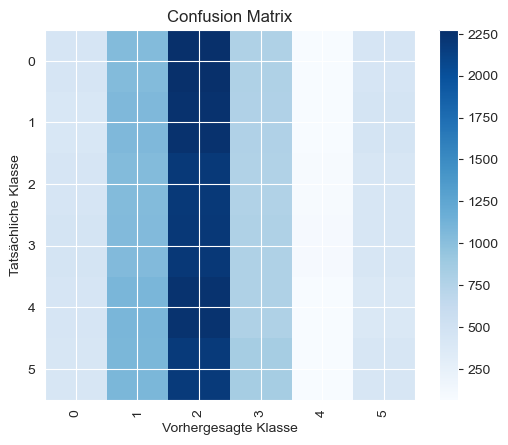

In [16]:
classes = np.unique(y_train)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xticks(rotation='vertical')

plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

In [17]:
classification_report_result = classification_report(y_test, predicted_classes)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.17      0.09      0.11      5036
           1       0.17      0.21      0.19      5024
           2       0.16      0.44      0.24      4926
           3       0.17      0.16      0.16      4993
           4       0.16      0.01      0.03      5012
           5       0.16      0.08      0.11      5009

    accuracy                           0.17     30000
   macro avg       0.17      0.17      0.14     30000
weighted avg       0.17      0.17      0.14     30000




CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.
